# Загрузка Pandas и очистка данных

В этом проекте поатавлена задача построение модели, которая предсказывает рейтинг ресторана. Если предсказания модели сильно отличаются от фактического результата, то, возможно, ресторан играет нечестно, и его стоит проверить.

In [1]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# регулярные выражения:        
import re

# модули для работы с временными значениями:
from datetime import datetime, timedelta




In [2]:
df = pd.read_csv('main_task_new.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [5]:
# Переименуем для удобства колонки 
df.columns = ["restaurant_id", "city", "cuisine_style", "ranking", "rating", "price", "number_of_reviews",
              "reviews", "URL", "ID"]

## City

In [6]:
df.city.unique()


array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [7]:
# Создадим dummy признаки для категориального признака - city
df = df.join(pd.get_dummies(df.city))

In [8]:
# Введем новые данные: численость населения
population = {
    'London' : 8909081,
    'Paris' : 2148271,
    'Madrid' : 3223334,
    'Barcelona' : 1620343,
    'Berlin' : 3769495,
    'Milan' : 1399860,
    'Rome' : 2860009,
    'Prague' : 1324277,
    'Lisbon' : 505526,
    'Vienna' : 2600000,
    'Amsterdam' : 872680,
    'Brussels' : 1208542,
    'Hamburg' : 1845229,
    'Munich' : 1484226,
    'Lyon' : 516092,
    'Stockholm' : 975904,
    'Budapest' : 1752286,
    'Warsaw' : 1793579,
    'Dublin' : 554554,
    'Copenhagen' : 794128,
    'Athens' : 664046,
    'Edinburgh' : 488050, 
    'Zurich' : 415215,
    'Oporto' : 287591,
    'Geneva' : 201818, 
    'Krakow' : 779115, 
    'Oslo' : 697549, 
    'Helsinki' : 656229,
    'Bratislava' : 437726,
    'Luxembourg' : 626108,
    'Ljubljana' : 295504
}

df['population'] = df['city'].map(population)
df['population']

0        2148271
1         975904
2        8909081
3        3769495
4        1484226
          ...   
39995    1399860
39996    2148271
39997     975904
39998    1793579
39999    1399860
Name: population, Length: 40000, dtype: int64

In [9]:

# введем еще один признак - отношение численности населения к 'ranking'

df['popranking'] = df['population'] / df['ranking']
df['popranking']

0          385.685996
1          634.940794
2        25238.189802
3         1090.079526
4         2390.057971
             ...     
39995     2799.720000
39996      338.790569
39997      590.740920
39998     2798.095164
39999      290.006215
Name: popranking, Length: 40000, dtype: float64

In [10]:
#ранг ресторана по городу

cities = df.city.value_counts()
df['city_number'] = df['city'].apply(lambda x: cities[x])
df['rate_ranking_in_city'] = df['ranking'] / df['city_number']
df['rate_ranking_in_city'].value_counts()

1.000000    14
0.500000     6
2.000000     6
2.500000     5
2.666667     5
            ..
2.289264     1
1.728361     1
2.353846     1
2.204620     1
0.180476     1
Name: rate_ranking_in_city, Length: 39557, dtype: int64

## Cuisine style

In [11]:
# Рассмотрим признак Cuisine Style на частоту встречаемых видов кухон в ресторанах:
df_copy = df.copy()
df_copy['cuisine_style'] = df_copy['cuisine_style'].fillna('0,0')
df_copy['cuisine_style'] = df_copy['cuisine_style'].apply(lambda x: eval(x))
df_copy = df_copy.explode('cuisine_style')
df_copy['cuisine_style'].value_counts()


0                      18566
Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
                       ...  
Yunnan                     1
Salvadoran                 1
Latvian                    1
Xinjiang                   1
Burmese                    1
Name: cuisine_style, Length: 126, dtype: int64

In [12]:
df['cuisine_style'] = df['cuisine_style'].fillna(0)

In [13]:
# Зададим списки ID ресторанов для 4 самых часто встречаемых видов кухон:
Vegetarian_Friendly = list(df[df['cuisine_style'].str.contains('Vegetarian Friendly', na=False)]['restaurant_id'])
European = list(df[df['cuisine_style'].str.contains('European', na=False)]['restaurant_id'])
Mediterranean = list(df[df['cuisine_style'].str.contains('Mediterranean', na=False)]['restaurant_id'])
Italian = list(df[df['cuisine_style'].str.contains('Italian', na=False)]['restaurant_id'])

# и создадим для них два булевых новых признака:
df['Vegetarian_Friendly'] = df['restaurant_id'].apply(lambda x: 1 if x in Vegetarian_Friendly else 0)
df['European'] = df['restaurant_id'].apply(lambda x: 1 if x in European else 0)
df['Mediterranean'] = df['restaurant_id'].apply(lambda x: 1 if x in Mediterranean else 0)
df['Italian'] = df['restaurant_id'].apply(lambda x: 1 if x in Italian else 0)

## Price

In [14]:
# Признак 'price' можно поставить по возрастанию (значит это не категориальный признак). 
# А это значит, что значения можно заменить последовательными числами, например 1,2,3
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
df['price'] = df['price'].map(price_dict)

In [15]:
# Пропуски заполним медианным значением
df['price'] = df['price'].fillna(df['price'].median())

## Number of Reviews

In [16]:
# Скорее всего разница значений с 'reviews' означает, что там пустой список
#  Заменим такие пропуски.

df.loc[df.number_of_reviews.isna()] = 0
df.number_of_reviews.value_counts()

0.0       2543
2.0       1916
3.0       1636
4.0       1370
5.0       1181
          ... 
2123.0       1
1633.0       1
1480.0       1
1924.0       1
1383.0       1
Name: number_of_reviews, Length: 1460, dtype: int64

## Reviews

In [17]:
df.reviews.value_counts().head(4)

[[], []]                                                                                        4874
0                                                                                               2543
[['The real codido madrileño'], ['03/31/2017']]                                                    2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]       2
Name: reviews, dtype: int64

In [18]:
# добавим признак с ресторанами, где нет отзывов:
df['Reviews_value']= df['reviews'].replace('[[], []]', 0)
df['Reviews_value']=df['Reviews_value'].apply(lambda x: 1 if x!=0 else x)
df['Reviews_value'].value_counts()

1    32583
0     7417
Name: Reviews_value, dtype: int64

In [19]:
#Выделим дату обзора в отдельный столбец
df['Reviews_date'] = df['reviews'].apply(lambda x: re.findall(r"\d\d\/\d\d\/\d{4}", str(x)) 
                                                           if len(re.findall(r"\d\d\/\d\d\/\d{4}", str(x))) == 2
                                                           else ['01/01/2000', '01/01/2000'])


In [20]:
# введем признак с разницей между отзывами, для удобства используем разницу в сутках:
df['Reviews_delta'] = df['Reviews_date'].apply(lambda x: (datetime.timestamp(datetime.strptime(x[0], '%m/%d/%Y')) - datetime.timestamp(datetime.strptime(x[1], '%m/%d/%Y')))/86400)
df['Reviews_delta']

0          41.000000
1         382.000000
2           2.000000
3           0.000000
4         272.000000
            ...     
39995      34.000000
39996       9.000000
39997    3127.041667
39998      23.000000
39999    1306.041667
Name: Reviews_delta, Length: 40000, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         40000 non-null  object 
 1   city                  40000 non-null  object 
 2   cuisine_style         40000 non-null  object 
 3   ranking               40000 non-null  float64
 4   rating                40000 non-null  float64
 5   price                 40000 non-null  float64
 6   number_of_reviews     40000 non-null  float64
 7   reviews               40000 non-null  object 
 8   URL                   40000 non-null  object 
 9   ID                    40000 non-null  object 
 10  Amsterdam             40000 non-null  uint8  
 11  Athens                40000 non-null  uint8  
 12  Barcelona             40000 non-null  uint8  
 13  Berlin                40000 non-null  uint8  
 14  Bratislava            40000 non-null  uint8  
 15  Brussels           

In [22]:
# Удалим ненужные столбцы
prep_data = df.drop(["city", "cuisine_style", "price", "reviews", "URL", "ID", 'Reviews_date'], axis=1)

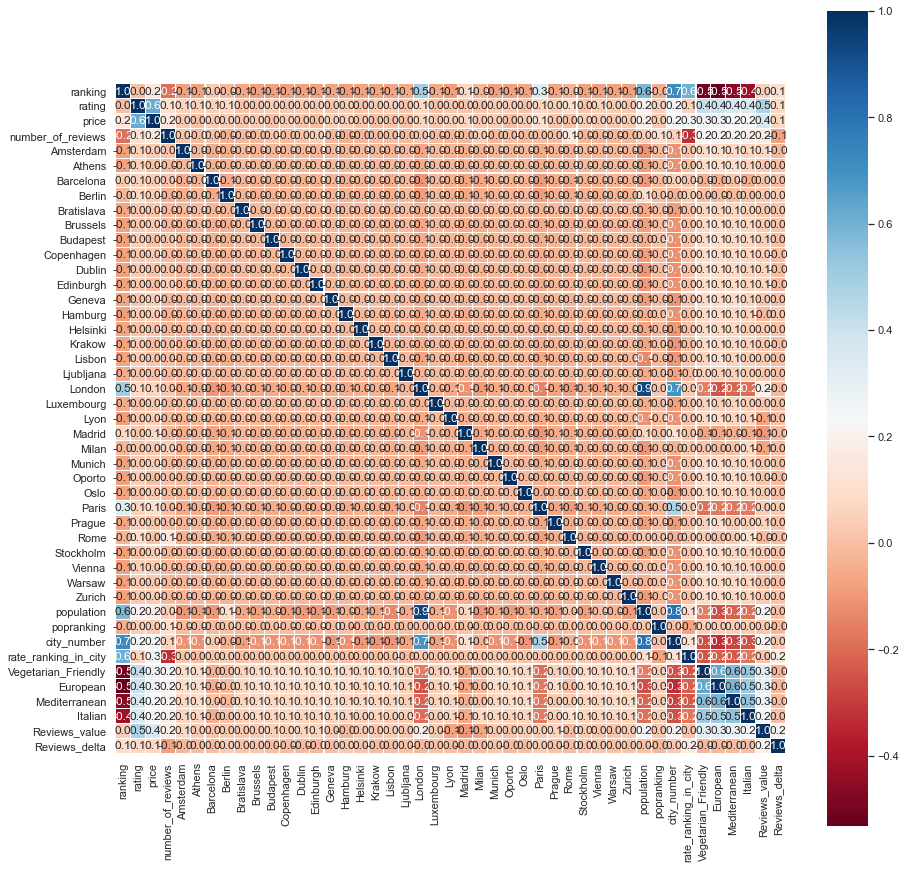

In [23]:
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

По корреляции видно только несколько прямых корреляций признаков, но нет полных соответствий, так что можно все признаки оставить. Хотя видно корреляцию между собой признаков кухни, так что возможно добавлять больше признаков из типов кухни не стоит

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [24]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = prep_data.drop(['restaurant_id', 'rating'], axis = 1)
y = prep_data['rating']

In [25]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [26]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [27]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [28]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [29]:
y_pred

array([3.68 , 3.405, 4.36 , ..., 3.04 , 4.355, 2.99 ])

In [30]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20426049999999998
